In this project students are going to install Python and the AI toolchain. There are many options to run a Python sample code and consequently test the environment. Any Python integrated development environment (IDE), whether it is Jupyter Notebooks, Spyder, a simple text editor, or terminal, is allowed. There is also a simpler solution—the use of Collaboratory (or Google Colab).

Collaboratory is a free and open source environment for Python development that requires no setup and runs entirely on the cloud. It contains all the preinstalled packages required for the class and is ready to run.

In this project, the Thompson Sampling model is used to test the installation. Using a Python IDE, copy and paste the code and execute the sample code.

In 750–1,000 words, describe your experience. Consider the following:

1. What is the issue/problem encountered?
2. What environment have you used? How?
3. What challenges could there be during installation? Provide examples and details.
4. Include a screenshot of the IDE and the output of the run.

The Python code necessary for this assignment is available within the zip file "DSC-550-Python-Project-Files," located in the Course Materials.

APA style is not required, but solid academic writing is expected. 

This assignment uses a rubric. Please review the rubric prior to beginning the assignment to become familiar with the expectations for successful completion.

You are required to submit this assignment to LopesWrite. Refer to the LopesWrite Technical Support articles for assistance.

In [ ]:
#MIT License

#Copyright (c) 2019 Packt

#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.

In [1]:
# AI for Sales & Advertizing - Sell like the Wolf of AI Street

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting the parameters
N = 10000
d = 9

In [2]:
# Building the environment inside a simulation
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

In [3]:
# Implementing Random Selection and Thompson Sampling
strategies_selected_rs = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
for n in range(0, N):
    # Random Selection
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts

In [4]:
# Computing the Relative Return
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Relative Return: {:.0f} %".format(relative_return))

Relative Return: 97 %


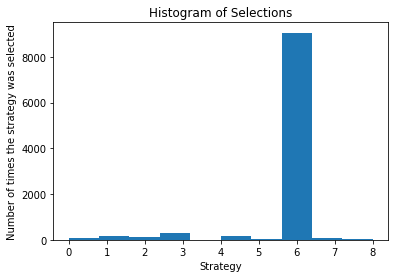

In [5]:
# Plotting the Histogram of Selections
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()